# Python in Jupyter Notebooks

A jupyter notebook is an interactive environment for running **python** code (and more). It is divided in *cells* that can be executed individually in the same interactive session. This enables quick experimentation and allows you to also add explanations (like this cell just did). 

<img src="https://storage.googleapis.com/kaggle-forum-message-attachments/703594/14673/DATAAC.jpeg" alt="meme" style="width:600px">

Click on the next cell and run it using ```SHIFT+ENTER```

In [1]:
print("Look at me! I am the data scientist now!")

Look at me! I am the data scientist now!


Let's get a bit used to writing python code by doing a few exercises:

### Pascal's Triangle
Complete the function that prints a pascal triangle, as in the example below:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/PascalTriangleAnimated2.gif" alt="Pascal">

Use this formula for computing the value of the element $ C(i, j)  = \frac{i!}{ (i-j)! * j! }$, where i is the row number and j is the column number.

```py
>>> pascal_triangle(5)
1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
```

Using the factorial function defined below implement the ```pascal_triangle``` function.

> Hint: check out the ```print``` function documentation [here](https://docs.python.org/3/library/functions.html#print) if you don't know how to make it not add the ```endline``` character after every call.

In [2]:
def factorial(x):
    """Returns the factorial of x"""
    result = 1
    for i in range(x):
        result *= i+1
    return result
    

def pascal_triangle(n):
    """Function that prints `n` rows of a Pascal triangle"""
    #your code here
    pass


Let's check our results

In [3]:
pascal_triangle(5)

1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 


### Monte Carlo estimation of $\pi$

Let's import the ```random``` library and do some basic list manipulation. 

In [4]:
# import the `random` python standard library
import random

# print a random real number betwwen 0 and 1
print(random.random())

# define an empty list
samples = []

# make a list of 3 random numbers
for i in range(3):
    samples.append(random.random())

# print the list
print(samples)

# create the same list using `comprehensions`
samples = [random.random() for _ in range(3)]
print(samples)

0.9940637192136492
[0.6058274554743757, 0.9719620617404549, 0.30691038173971275]
[0.39268785356793245, 0.7359071374669853, 0.6353566736205855]


> Note that when creating any for loop you can replace the index variable with ```_``` if you are not going to use it and don't want it declared.

Considering a circle of diameter 1 inside of a square of length 1, we can sample random points inside the square count how many are also inside the circle:

<img src="https://www.101computing.net/wp/wp-content/uploads/estimating-pi-monte-carlo-method.png" alt="visual_example" style="width:400">

$\frac{N_\text{inside}}{N_\text{total}} \approx \frac{S_\text{circle}}{S_\text{square}} = \frac{\pi r^2}{4 r^2} \Rightarrow \pi \approx \frac{4 N_\text{inside}}{N_\text{total}}$

Now complete the following function in order to return an approximation of $\pi$ based on ```n``` random numbers. 

In [5]:
def approx_pi(n):
    n_inside = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            n_inside += 1
    return 4*n_inside / n

In [6]:
pis = [ approx_pi(10), approx_pi(100), approx_pi(1000),
        approx_pi(10_000), approx_pi(100_000),  approx_pi(1_000_000)]
print(pis)

[3.2, 2.92, 3.124, 3.1348, 3.14344, 3.139112]


> Tip: you can add underscores to separate long numbers. They will be ignored by the interpreter, but they add clarity to your code

In [7]:
# python basic math library
import math

# calculate the approximation errors
errors = []
for approx in pis:
    errors.append(abs(math.pi - approx))

# BONUS: can you compute the erros using list comprehensions?
errors = [abs(math.pi - i) for i in pis]
print(errors)

[0.05840734641020706, 0.2215926535897932, 0.017592653589793006, 0.006792653589793307, 0.001847346410206896, 0.0024806535897932136]


### Making simple plots 

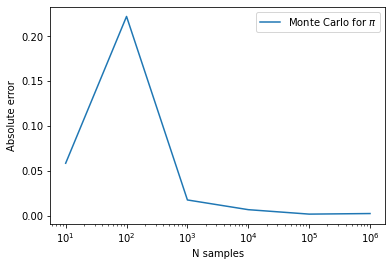

In [8]:
import matplotlib.pyplot as plt

# the x-axis value
n_samples = [10, 100, 1000, 10_000, 
            100_000, 1_000_000]


plt.figure()                                    # defining a figure
plt.plot(n_samples, errors,                     # data for x and y axis
            label="Monte Carlo for $\pi$")      # label visible in legend
plt.xscale("log")                               # logarithmic scale on x
plt.xlabel("N samples")                         
plt.ylabel("Absolute error")
plt.legend()                                    # enable the legend
plt.show()                                      # show the figure

### The elephant in the room

Python is **slow** !!! You can never come close to C++ performance for computation heavy tasks. But not all hope is lost, you can use *C++/Fortran* libraries inside python.

**numpy** is a library that has python wrappers to C++ compute code. Let's take a look 

In [9]:
import numpy as np


In [10]:
# Monte Carlo pi with numpy
def approx_pi_fast(n):
    x = np.random.random(n)
    y = np.random.random(n)
    d = x**2+y**2
    inside = (d<=1.0).sum()

    return 4*inside/n


Let's see how much faster we can get

In [11]:
%time approx_pi(10_000_000)
%time approx_pi_fast(10_000_000)

CPU times: user 3.43 s, sys: 0 ns, total: 3.43 s
Wall time: 3.43 s
CPU times: user 159 ms, sys: 35.6 ms, total: 195 ms
Wall time: 242 ms


3.1410224

### Homework
Make a plot of the execution time for ```approx_pi``` and ```approx_pi_fast``` for various number of samples. 1-10000000. Use the [timeit](https://docs.python.org/3/library/timeit.html) package.

**Bonus:** Include the error bars for the measurement.

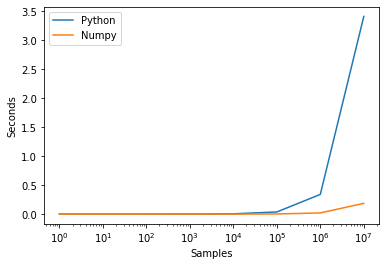

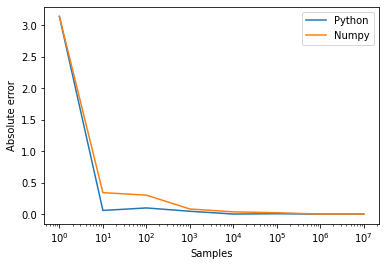

In [12]:
import timeit

samples = [1, 10, 100, 
           1_000, 10_000, 100_000,
           1_000_000, 10_000_000 ]
time_slow = []
time_fast = []
errors_slow = []
errors_fast = []
for i in samples:
    time_slow.append(timeit.timeit(lambda:approx_pi(i), number = 1))
    time_fast.append(timeit.timeit(lambda:approx_pi_fast(i), number = 1))
    errors_slow.append(abs(math.pi - approx_pi(i)))
    errors_fast.append(abs(math.pi - approx_pi_fast(i)))

plt.figure()                                    
plt.plot(samples, time_slow, label = "Python")
plt.plot(samples, time_fast, label = "Numpy")
plt.xscale("log")
plt.xlabel("Samples")
plt.ylabel("Seconds")
plt.legend()
plt.show()

plt.figure()                                    
plt.plot(samples, errors_slow, label = "Python")
plt.plot(samples, errors_fast, label = "Numpy")
plt.xscale("log")
plt.xlabel("Samples")
plt.ylabel("Absolute error")
plt.legend()
plt.show()